In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler

In [203]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [204]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import pickle



In [205]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
data = pd.read_csv('/content/drive/MyDrive/dataset mka/data_bersih.csv')

In [207]:
data

,Year experiment started,Measurement date,Depth of soil sampling,Soil gravimetric moisture content,Total daily rainfall,Maximum daily air temperature,Minimum daily air temperature,Year of measurement,Treatment_y,Block number,Daily nitrous oxide emission
0,2007,2007-03-13,0-15,23.82,0.0,11.6,3.9,2007,Control,1,5.733000
1,2007,2007-03-13,0-15,23.82,0.0,11.6,3.9,2007,Control,2,3.478970
2,2007,2007-03-13,0-15,23.82,0.0,11.6,3.9,2007,Control,3,4.689665
3,2007,2007-03-13,0-15,23.82,0.0,11.6,3.9,2007,Ammoniumn nitrate 70 kg N/ha,1,0.877754
4,2007,2007-03-13,0-15,23.82,0.0,11.6,3.9,2007,Ammoniumn nitrate 70 kg N/ha,2,5.670685
...,...,...,...,...,...,...,...,...,...,...,...
744,2007,2008-02-14,0-15,23.68,0.4,4.1,0.0,2007,Ammoniumn nitrate 70 kg N/ha,1,0.176191
745,2007,2008-02-14,0-15,23.68,0.4,4.1,0.0,2007,Ammoniumn nitrate 90 kg N/ha,1,0.134680
746,2007,2008-02-14,0-15,23.68,0.4,4.1,0.0,2007,Ammoniumn nitrate 130 kg N/ha,1,0.157741
747,2007,2008-02-14,0-15,23.68,0.4,4.1,0.0,2007,Ammoniumn nitrate 160 kg N/ha,1,1.564498


In [208]:
data['Measurement date'] = pd.to_datetime(data['Measurement date']) - pd.to_timedelta(7, unit='d')
data = data.groupby(pd.Grouper(key='Measurement date', freq='W-MON', sort=True)).mean().reset_index()
data

<ipython-input-208-38ec78e8ce1f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(pd.Grouper(key='Measurement date', freq='W-MON', sort=True)).mean().reset_index()


,Measurement date,Year experiment started,Soil gravimetric moisture content,Total daily rainfall,Maximum daily air temperature,Minimum daily air temperature,Year of measurement,Block number,Daily nitrous oxide emission
0,2007-03-12,2007.0,23.923151,1.621918,10.854795,2.532877,2007.0,1.972603,2.077526
1,2007-03-19,2007.0,25.320000,0.000000,5.600000,-1.300000,2007.0,2.066667,2.540687
2,2007-03-26,2007.0,26.020000,1.000000,9.700000,0.400000,2007.0,2.058824,3.023091
3,2007-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-04-09,2007.0,19.020000,0.000000,17.200000,6.200000,2007.0,1.941176,1.909144
5,2007-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2007-04-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2007-04-30,2007.0,12.000000,0.000000,15.100000,6.000000,2007.0,1.454545,2.974337
8,2007-05-07,2007.0,22.460000,15.600000,13.500000,7.300000,2007.0,1.875000,5.291373
9,2007-05-14,2007.0,22.585373,3.991045,16.223881,9.782090,2007.0,2.014925,21.462956


In [209]:
df_nitrous= data[['Measurement date', 'Daily nitrous oxide emission']]
df_nitrous

,Measurement date,Daily nitrous oxide emission
0,2007-03-12,2.077526
1,2007-03-19,2.540687
2,2007-03-26,3.023091
3,2007-04-02,NaN
4,2007-04-09,1.909144
5,2007-04-16,NaN
6,2007-04-23,NaN
7,2007-04-30,2.974337
8,2007-05-07,5.291373
9,2007-05-14,21.462956


In [210]:
df_nitrous = df_nitrous.rename(columns={'Measurement date': 'date', 'Daily nitrous oxide emission': 'nitro'})

In [211]:
df_nitrous

,date,nitro
0,2007-03-12,2.077526
1,2007-03-19,2.540687
2,2007-03-26,3.023091
3,2007-04-02,NaN
4,2007-04-09,1.909144
5,2007-04-16,NaN
6,2007-04-23,NaN
7,2007-04-30,2.974337
8,2007-05-07,5.291373
9,2007-05-14,21.462956


#Interpolasi Niai Nol

In [212]:
#Interpolasi nilai 0
df_nitrous['nitro']=df_nitrous['nitro'].interpolate(method="linear")

In [213]:
df_nitrous

,date,nitro
0,2007-03-12,2.077526
1,2007-03-19,2.540687
2,2007-03-26,3.023091
3,2007-04-02,2.466117
4,2007-04-09,1.909144
5,2007-04-16,2.264208
6,2007-04-23,2.619273
7,2007-04-30,2.974337
8,2007-05-07,5.291373
9,2007-05-14,21.462956


In [214]:
df_nitrous.to_csv('/content/drive/MyDrive/dataset mka/df_nitrous.csv', index=False)

In [215]:
df_nitrous = pd.read_csv('/content/drive/MyDrive/dataset mka/df_nitrous.csv')
df_nitrous

,date,nitro
0,2007-03-12,2.077526
1,2007-03-19,2.540687
2,2007-03-26,3.023091
3,2007-04-02,2.466117
4,2007-04-09,1.909144
5,2007-04-16,2.264208
6,2007-04-23,2.619273
7,2007-04-30,2.974337
8,2007-05-07,5.291373
9,2007-05-14,21.462956


In [216]:
df_nitrous['date'] = pd.to_datetime(df_nitrous['date']) - pd.to_timedelta(7, unit='d')

In [217]:
original_df = df_nitrous.copy()
original_df

,date,nitro
0,2007-03-05,2.077526
1,2007-03-12,2.540687
2,2007-03-19,3.023091
3,2007-03-26,2.466117
4,2007-04-02,1.909144
5,2007-04-09,2.264208
6,2007-04-16,2.619273
7,2007-04-23,2.974337
8,2007-04-30,5.291373
9,2007-05-07,21.462956


In [218]:
def time_plot(data, x_col, y_col, title):
    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(x=x_col, y=y_col, data=df_nitrous, ax=ax, color='mediumblue', label='Total Nitrous')

    second = df_nitrous.groupby(df_nitrous[x_col].dt.year)[y_col].mean().reset_index()
    second[x_col] = pd.to_datetime(second[x_col], format='%Y')
    sns.lineplot(x=(second[x_col] + datetime.timedelta(2*365/12)), y=y_col, data=second, ax=ax, color='red', label='Mean Nitrous')

    ax.set(xlabel = "Date",
           ylabel = "Nitro Emission",
           title = title)

    sns.despine()

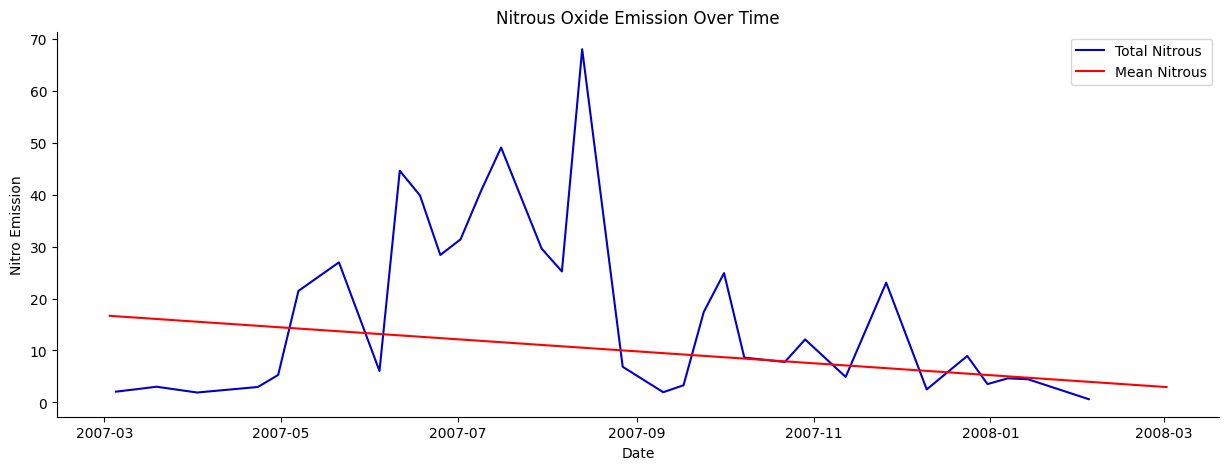

In [219]:
time_plot(df_nitrous, 'date', 'nitro', 'Nitrous Oxide Emission Over Time')

In [220]:
def get_diff(data):
    data['nitrous_diff'] = data['nitro'].diff()
    data = data.dropna()

    return data

stationary_df = get_diff(df_nitrous)

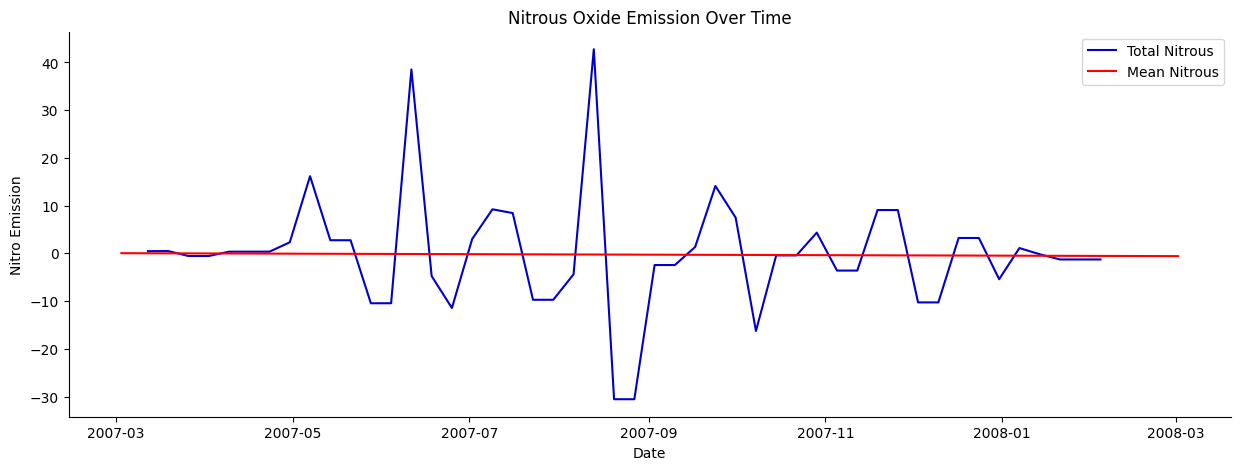

In [221]:
time_plot(stationary_df, 'date', 'nitrous_diff', 'Nitrous Oxide Emission Over Time')

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


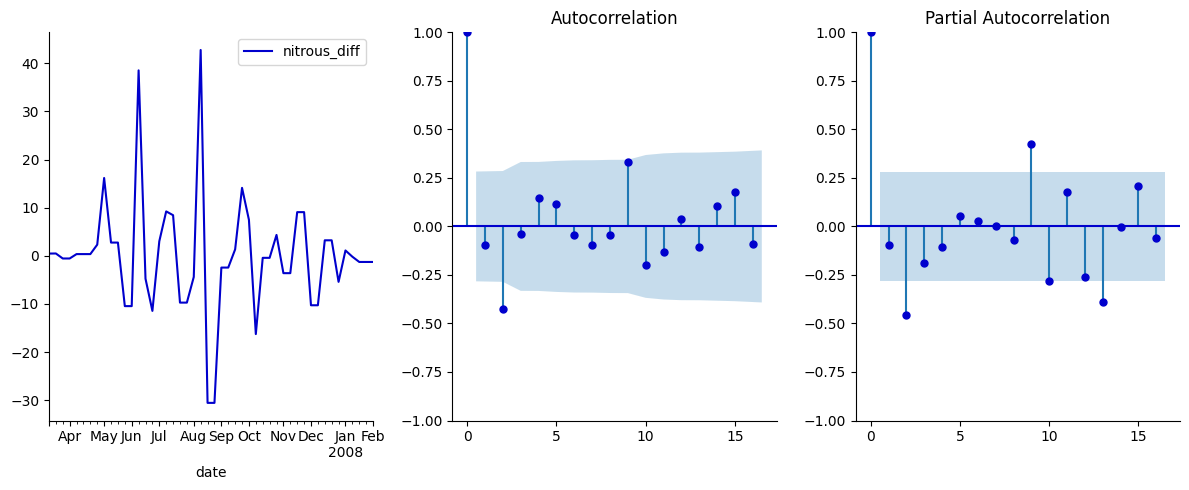

In [222]:
def plots(data, lags=None):

    # Convert dataframe to datetime index
    dt_data = data.set_index('date').drop('nitro', axis=1)
    dt_data.dropna(axis=0)

    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))

    dt_data.plot(ax=raw, figsize=(12, 5), color='mediumblue')
    smt.graphics.plot_acf(dt_data, lags=lags, ax=acf, color='mediumblue')
    smt.graphics.plot_pacf(dt_data, lags=lags, ax=pacf, color='mediumblue')
    sns.despine()
    plt.tight_layout()

plots(stationary_df, lags=16);

Modelling


In [223]:
#create dataframe for transformation from time series to supervised
def generate_supervised(data):
    supervised_df = data.copy()

    #create column for each lag
    for i in range(1,5):
        col_name = 'lag_' + str(i)
        supervised_df[col_name] = supervised_df['nitrous_diff'].shift(i)

    #drop null values
    supervised_df = supervised_df.dropna().reset_index(drop=True)

    supervised_df.to_csv('/content/drive/MyDrive/dataset mka/modelnitrous_df', index=False)

    return supervised_df

In [224]:
modelnitrous_df = generate_supervised(stationary_df)

In [225]:
modelnitrous_df

,date,nitro,nitrous_diff,lag_1,lag_2,lag_3,lag_4
0,2007-04-09,2.264208,0.355064,-0.556973,-0.556973,0.482404,0.463161
1,2007-04-16,2.619273,0.355064,0.355064,-0.556973,-0.556973,0.482404
2,2007-04-23,2.974337,0.355064,0.355064,0.355064,-0.556973,-0.556973
3,2007-04-30,5.291373,2.317036,0.355064,0.355064,0.355064,-0.556973
4,2007-05-07,21.462956,16.171583,2.317036,0.355064,0.355064,0.355064
5,2007-05-14,24.213618,2.750662,16.171583,2.317036,0.355064,0.355064
6,2007-05-21,26.964280,2.750662,2.750662,16.171583,2.317036,0.355064
7,2007-05-28,16.508726,-10.455554,2.750662,2.750662,16.171583,2.317036
8,2007-06-04,6.053171,-10.455554,-10.455554,2.750662,2.750662,16.171583
9,2007-06-11,44.591442,38.538271,-10.455554,-10.455554,2.750662,2.750662


**Splittng Data**

In [226]:
#training and testing split data
def tts(data):
  data = data.drop(['nitro', 'date'], axis = 1)
  train, test = data[0:-12].values, data[-12:].values

  return train, test

train, test = tts(modelnitrous_df)

In [227]:
train.shape

(32, 5)

In [228]:
test.shape

(12, 5)

In [229]:
def scale_data(train_set, test_set):
  #apply Min Max Scaller
  scaler = MinMaxScaler()
  scaler = scaler.fit(train_set)

  #reshape training set
  train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
  train_set_scaled = scaler.transform(train_set)

  #reshape test set
  test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
  test_set_scaled = scaler.transform(test_set)

  X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1].ravel()
  X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1].ravel()

  return X_train, y_train, X_test, y_test, scaler
#scalling procces
X_train, y_train, X_test, y_test, scaler_object = scale_data(train, test)

In [230]:
X_train.shape

(32, 4)

In [231]:
y_train.shape

(32,)

In [232]:
def undo_scaling(y_pred, x_test, scaler_obj, lstm=False):
    #reshape y_pred
    y_pred = y_pred.reshape(y_pred.shape[0], 1, 1)

    if not lstm:
        x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])

    #rebuild test set for inverse transform
    pred_test_set = []
    for index in range(0,len(y_pred)):
        pred_test_set.append(np.concatenate([y_pred[index],x_test[index]],axis=1))

    #reshape pred_test_set
    pred_test_set = np.array(pred_test_set)
    pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])

    #inverse transform
    pred_test_set_inverted = scaler_obj.inverse_transform(pred_test_set)

    return pred_test_set_inverted

In [233]:
def load_original_df():
  #load in original dataframe without scaling applied
    original_df = pd.read_csv('/content/drive/MyDrive/dataset mka/df_nitrous.csv')

    return original_df

In [234]:
def predict_df(unscaled_predictions, original_df):
  #create dataframe that shows the predicted sales
  result_list = []
  nitrous_dates = list(original_df[-13:].date)
  act_nitrous = list(original_df[-13:].nitro)

  for index in range(0,len(unscaled_predictions)):
    result_dict = {}
    result_dict['pred_value'] = int(unscaled_predictions[index][0] + act_nitrous[index])
    result_dict['date'] = nitrous_dates[index+1]
    result_list.append(result_dict)


  df_result = pd.DataFrame(result_list)
  return df_result

In [235]:
#fungsi untuk mndapatkan nilai error

model_scores = {}

def get_scores(unscaled_df, original_df, model_name):
  rmse = np.sqrt(mean_squared_error(original_df.nitro[-12:], unscaled_df.pred_value[-12:]))
  mae = mean_absolute_error(original_df.nitro[-12:],unscaled_df.pred_value[-12:])
  r2 = r2_score(original_df.nitro[-12:],unscaled_df.pred_value[-12:])
  model_scores[model_name] = [rmse,mae,r2]

  print(f"RMSE: {rmse}")
  print(f"MAE: {mae}")
  print(f"R2 Score: {r2}")

In [236]:
#fungsi untuk memvisualkan hasil
def plot_results(results, original_df, model_name):

    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(x=original_df.date, y=original_df.nitro, data=original_df, ax=ax,
                 label='Original', color='mediumblue')
    sns.lineplot(x=results.date, y=results.pred_value, data=results, ax=ax,
                 label='Predicted', color='Red')

    ax.set(xlabel = "Date",
           ylabel = "Nitrous",
           title = f"{model_name} Nitrous Emission Forecasting Prediction")

    ax.legend()

    sns.despine()

    plt.savefig(f'/content/drive/MyDrive/dataset mka/{model_name}_forecast.png')

In [237]:
def run_model(train_data, test_data, model, model_name):

    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data, test_data)

    mod = model
    mod.fit(X_train, y_train)
    predictions = mod.predict(X_test)



    # Undo scaling to compare predictions against original data
    original_df = load_original_df()
    unscaled = undo_scaling(predictions, X_test, scaler_object)
    unscaled_df = predict_df(unscaled, original_df)

    get_scores(unscaled_df, original_df, model_name)

    plot_results(unscaled_df, original_df, model_name)

RMSE: 4.607250897582327
MAE: 3.7531408827404777
R2 Score: 0.4593049361153636


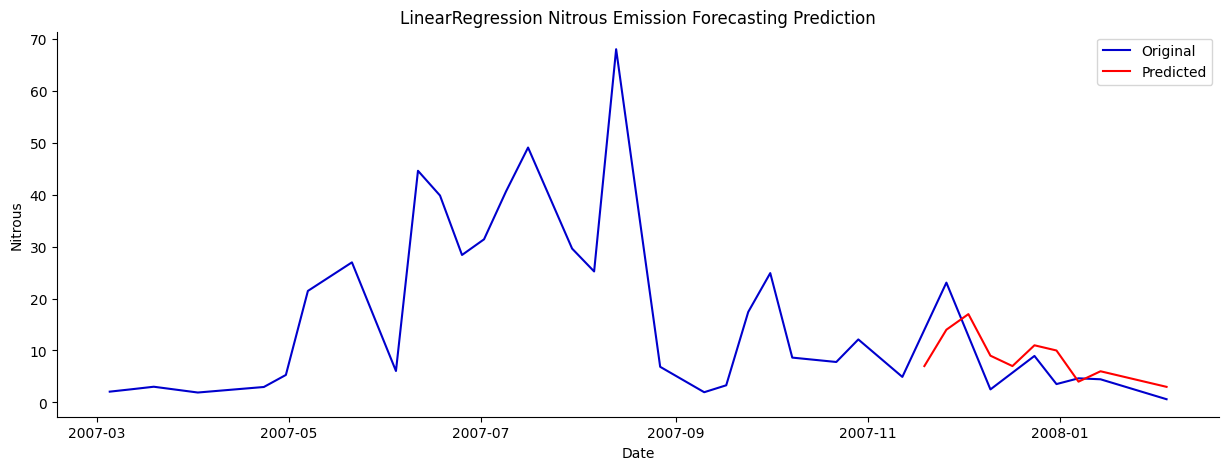

In [238]:
X_train, y_train, X_test, y_test, scaler_object = scale_data(train, test)

mod = LinearRegression()
mod.fit(X_train, y_train)

predictions = mod.predict(X_test)

# save model
pickle.dump(mod, open('model-linreg.pkl','wb'))

# Undo scaling to compare predictions against original data
#original_df = load_original_df()
unscaled = undo_scaling(predictions, X_test, scaler_object)
unscaled_df = predict_df(unscaled, original_df)

get_scores(unscaled_df, original_df, 'LinearRegression')

plot_results(unscaled_df, original_df, 'LinearRegression')

##Random Forest

RMSE: 4.922015312613392
MAE: 4.419807549407144
R2 Score: 0.3829013459934787


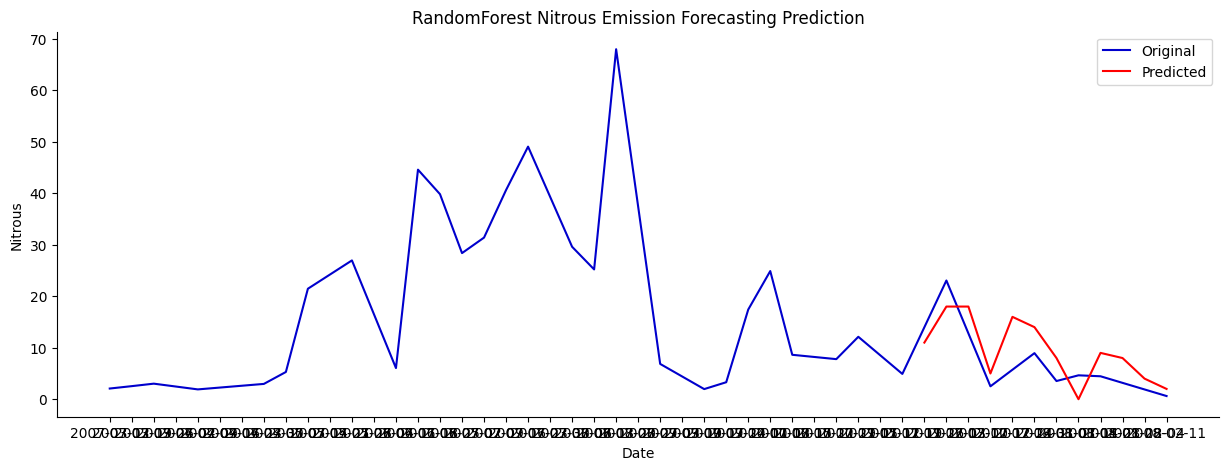

In [239]:
 run_model(train, test, RandomForestRegressor(n_estimators=300, max_depth=30),'RandomForest')

RMSE: 9.698196294495588
MAE: 6.966444786830497
R2 Score: -1.3958003191801556


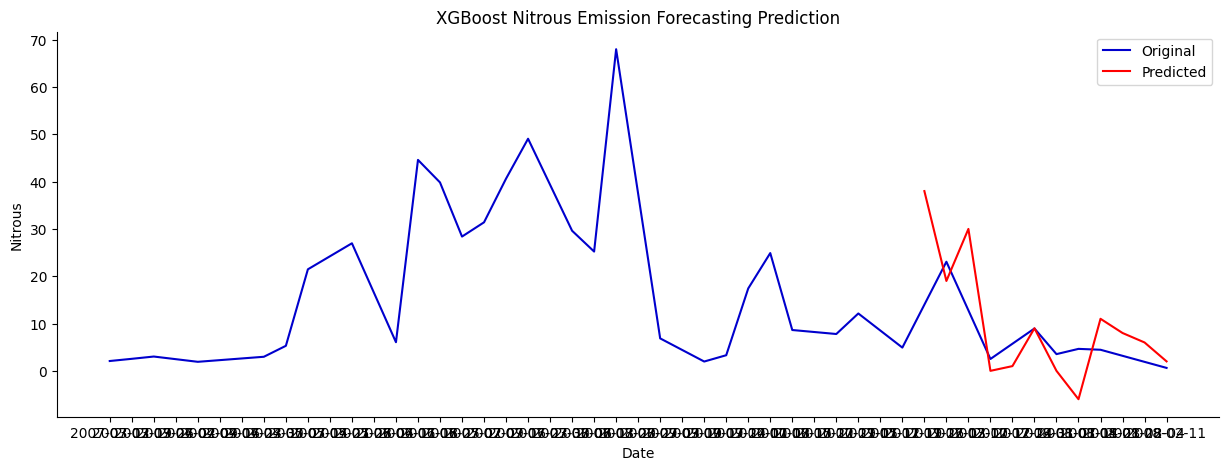

In [240]:
run_model(train, test, XGBRegressor(n_estimators=100,
                                    learning_rate=0.2,
                                    objective='reg:squarederror'), 'XGBoost')

In [241]:
def lstm_model(train_data, test_data):

    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data, test_data)

    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

    model = Sequential()
    model.add(LSTM(64, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]),
                   stateful=True))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=300, batch_size=1, verbose=1,
              shuffle=False)
    predictions = model.predict(X_test,batch_size=1)

    #original_df = load_original_df()
    unscaled = undo_scaling(predictions, X_test, scaler_object, lstm=True)
    unscaled_df = predict_df(unscaled, original_df)

    get_scores(unscaled_df, original_df, 'LSTM')

    plot_results(unscaled_df, original_df, 'LSTM')

Epoch 1/300
32/32 [==============================] - 4s 6ms/step - loss: 0.0806
Epoch 2/300
32/32 [==============================] - 0s 6ms/step - loss: 0.0450
Epoch 3/300
32/32 [==============================] - 0s 6ms/step - loss: 0.0417
Epoch 4/300
32/32 [==============================] - 0s 6ms/step - loss: 0.0427
Epoch 5/300
32/32 [==============================] - 0s 6ms/step - loss: 0.0421
Epoch 6/300
32/32 [==============================] - 0s 4ms/step - loss: 0.0415
Epoch 7/300
32/32 [==============================] - 0s 10ms/step - loss: 0.0412
Epoch 8/300
32/32 [==============================] - 0s 8ms/step - loss: 0.0408
Epoch 9/300
32/32 [==============================] - 0s 8ms/step - loss: 0.0405
Epoch 10/300
32/32 [==============================] - 0s 10ms/step - loss: 0.0401
Epoch 11/300
32/32 [==============================] - 0s 7ms/step - loss: 0.0397
Epoch 12/300
32/32 [==============================] - 0s 5ms/step - loss: 0.0394
Epoch 13/300
32/32 [===============

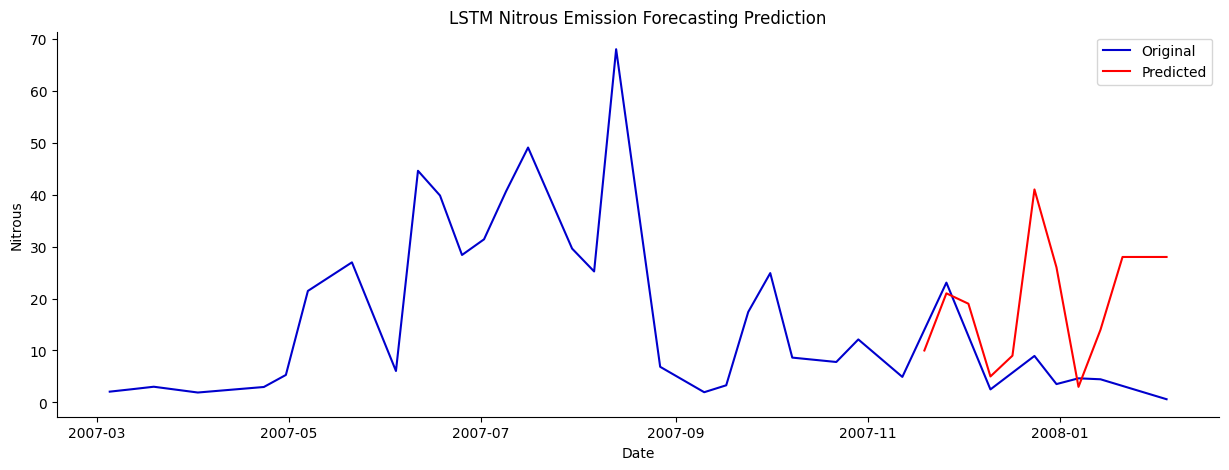

In [242]:
# Memanggil fungsi lstm_model dengan data pelatihan dan data uji
lstm_model(train, test)


In [243]:
pickle.dump(model_scores, open("model_scores.p", "wb"))

In [244]:
def create_results_df():
    results_dict = pickle.load(open("model_scores.p", "rb"))

    results_df = pd.DataFrame.from_dict(results_dict, orient='index',
                                        columns=['RMSE', 'MAE','R2'])

    results_df = results_df.sort_values(by='RMSE', ascending=False).reset_index()

    return results_df

In [245]:
results = create_results_df()
results

,index,RMSE,MAE,R2
0,LSTM,17.674276,13.503141,-6.957048
1,XGBoost,9.698196,6.966445,-1.395800
2,RandomForest,4.922015,4.419808,0.382901
3,LinearRegression,4.607251,3.753141,0.459305


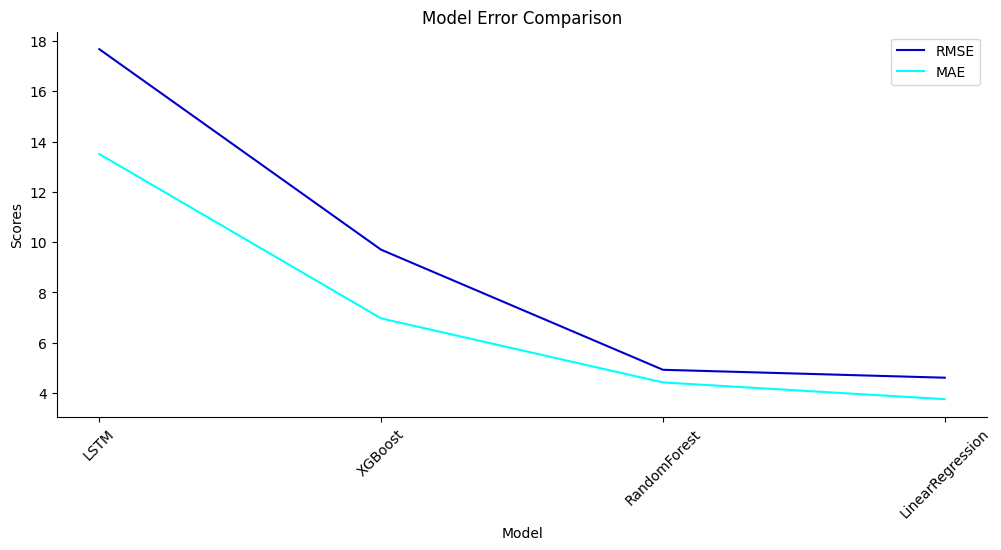

In [247]:
def plot_results(results_df):
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.lineplot(x=np.arange(len(results_df)), y='RMSE', data=results_df, ax=ax,
                 label='RMSE', color='mediumblue')
    sns.lineplot(x=np.arange(len(results_df)), y='MAE', data=results_df, ax=ax,
                 label='MAE', color='Cyan')

    plt.xticks(np.arange(len(results_df)),rotation=45)
    ax.set_xticklabels(results_df['index'])
    ax.set(xlabel = "Model",
           ylabel = "Scores",
           title = "Model Error Comparison")
    sns.despine()

    #plt.savefig(f'Datasets/drugstore/compare_models.png')
plot_results(results)